# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import requests
import newsapi

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Liam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
from newsapi.newsapi_client import NewsApiClient

api_key= 'e4cdc7de2654482cb274229a577bc2d1'


In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key = api_key)


In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
BTC = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")



In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ETH = newsapi.get_everything(
    q = "ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy")





In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in BTC["articles"]:
    try:
        text = article["content"]
        title = article["title"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        bitcoin_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Bitcoin title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass
    

In [7]:
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

columns = ["Compound", "Negative", "Neutral", "Positive", "Bitcoin title", "text"]
bitcoin_df = bitcoin_df[columns]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text
0,-0.3818,0.176,0.689,0.135,"Jack Dorsey defends Twitter’s Trump ban, then ...",Ban reflects Twitters failure to promote healt...
1,-0.5574,0.096,0.904,0.000,Mt. Gox exchange users may finally get to reco...,"When Mt. Gox went bankrupt in 2014, it was the..."
2,0.6249,0.000,0.850,0.150,Gemini is launching a credit card with bitcoin...,Cryptocurrency exchange company Gemini is acqu...
3,0.0000,0.000,1.000,0.000,Learn how to responsibly invest in Bitcoin wit...,TL;DR: The Bitcoin and Cryptocurrency Mastery ...
4,-0.5037,0.114,0.886,0.000,"Elon Musk changes Twitter bio to #bitcoin, cha...","As the man himself said, it was inevitable. \r..."


In [8]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

ethereum_sentiments = []

for article in ETH["articles"]:
    try:
        text = article["content"]
        title = article['title']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        ethereum_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Ethereum title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass
    
    

In [9]:
ethereum_df = pd.DataFrame(ethereum_sentiments)

columns = ["Compound", "Negative", "Neutral", "Positive", "Ethereum title", "text"]
ethereum_df = ethereum_df[columns]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text
0,0.0000,0.0,1.000,0.000,Coinbase is going public via direct listing,Coinbase plans to go public by way of a direct...
1,0.0000,0.0,1.000,0.000,Ethereum scales record peak before futures lau...,FILE PHOTO: Representation of the Ethereum vir...
2,0.0000,0.0,1.000,0.000,Cryptocurrency Ethereum hits record high ahead...,By Reuters Staff\r\nFILE PHOTO: Representation...
3,0.0000,0.0,1.000,0.000,"Elon Musk, back on Twitter, turns his support ...",FILE PHOTO: Representation of the Ethereum vir...
4,0.3412,0.0,0.926,0.074,A crypto CEO breaks down why he would not be s...,Cryptocurrencies stole headlines on the first ...


In [10]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.062200,0.056100,0.885850,0.058150
std,0.420023,0.058145,0.115575,0.094303
min,-0.599400,0.000000,0.647000,0.000000
25%,-0.386825,0.000000,0.842750,0.000000
50%,0.000000,0.058000,0.897500,0.000000
75%,0.000000,0.099500,1.000000,0.085500
max,0.921700,0.176000,1.000000,0.353000


In [11]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()


,Compound,Negative,Neutral,Positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.123374,0.023968,0.919032,0.057011
std,0.348758,0.049680,0.091538,0.074360
min,-0.812600,0.000000,0.687000,0.000000
25%,0.000000,0.000000,0.875000,0.000000
50%,0.000000,0.000000,0.935500,0.017500
75%,0.356200,0.027750,1.000000,0.100000
max,0.900100,0.208000,1.000000,0.313000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re

[nltk_data] Downloading package stopwords to /Users/Liam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Liam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Liam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# Complete the tokenizer function
# Instantiate the lemmatizer
# YOUR CODE HERE!

# Create a list of stopwords
# YOUR CODE HERE!

# Expand the default stopwords list if necessary

# YOUR CODE HERE!
def tokenizer(text):
    """returns a list of words that is lemmatized, stopworded, tokenized, and free of any non-letter characters. """
    # Remove the punctuation from text
    # Create a tokenized list of the words
    # Lemmatize words into root words
    # Convert the words to lowercase
    # Remove the stop words
    lemmatizer = WordNetLemmatizer()
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]

In [14]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df['Tokens'] = bitcoin_df['text'].apply(tokenizer)

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text,Tokens
0,-0.3818,0.176,0.689,0.135,"Jack Dorsey defends Twitter’s Trump ban, then ...",Ban reflects Twitters failure to promote healt...,"[ban, reflects, twitter, failure, promote, hea..."
1,-0.5574,0.096,0.904,0.000,Mt. Gox exchange users may finally get to reco...,"When Mt. Gox went bankrupt in 2014, it was the...","[mt, gox, went, bankrupt, world, largest, bitc..."
2,0.6249,0.000,0.850,0.150,Gemini is launching a credit card with bitcoin...,Cryptocurrency exchange company Gemini is acqu...,"[cryptocurrency, exchange, company, gemini, ac..."
3,0.0000,0.000,1.000,0.000,Learn how to responsibly invest in Bitcoin wit...,TL;DR: The Bitcoin and Cryptocurrency Mastery ...,"[tldr, bitcoin, cryptocurrency, mastery, bundl..."
4,-0.5037,0.114,0.886,0.000,"Elon Musk changes Twitter bio to #bitcoin, cha...","As the man himself said, it was inevitable. \r...","[man, said, inevitableon, friday, tesla, ceo, ..."


In [15]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['Tokens'] = ethereum_df['text'].apply(tokenizer)

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Ethereum title,text,Tokens
0,0.0000,0.0,1.000,0.000,Coinbase is going public via direct listing,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list..."
1,0.0000,0.0,1.000,0.000,Ethereum scales record peak before futures lau...,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.0000,0.0,1.000,0.000,Cryptocurrency Ethereum hits record high ahead...,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, et..."
3,0.0000,0.0,1.000,0.000,"Elon Musk, back on Twitter, turns his support ...",FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
4,0.3412,0.0,0.926,0.074,A crypto CEO breaks down why he would not be s...,Cryptocurrencies stole headlines on the first ...,"[cryptocurrencies, stole, headline, first, sto..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
flat_btc_tokens = [item for sublist in bitcoin_df.Tokens.to_list() for item in sublist]
bigram_counts = Counter(ngrams(flat_btc_tokens, n=2))
bigram_counts.most_common(20)

[(('photo', 'representation'), 4),
 (('representation', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'bitcoin'), 4),
 (('bitcoin', 'seen'), 4),
 (('illustration', 'taken'), 4),
 (('reuters', 'bitcoin'), 4),
 (('bitcoin', 'fell'), 4),
 (('cryptocurrency', 'exchange'), 3),
 (('char', 'reuters'), 3),
 (('reuters', 'stafffile'), 3),
 (('stafffile', 'photo'), 3),
 (('seen', 'illustration'), 3),
 (('taken', 'november'), 3),
 (('november', 'reutersdado'), 3),
 (('reutersdado', 'ruvicillustrationtokyo'), 3),
 (('ruvicillustrationtokyo', 'reuters'), 3),
 (('char', 'tldr'), 2),
 (('bitcoin', 'cryptocurrency'), 2),
 (('sale', 'jan'), 2)]

In [22]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
flat_eth_tokens = [item for sublist in ethereum_df.Tokens.to_list() for item in sublist]
eth_bigram_counts = Counter(ngrams(flat_eth_tokens, n=2))
eth_bigram_counts.most_common(20)

[(('virtual', 'currency'), 17),
 (('photo', 'representation'), 16),
 (('char', 'reuters'), 14),
 (('reuters', 'stafffile'), 13),
 (('stafffile', 'photo'), 13),
 (('representation', 'virtual'), 13),
 (('currency', 'bitcoin'), 13),
 (('illustration', 'taken'), 13),
 (('bitcoin', 'seen'), 10),
 (('seen', 'illustration'), 7),
 (('char', 'bitcoin'), 6),
 (('taken', 'november'), 5),
 (('november', 'reutersdado'), 5),
 (('seen', 'picture'), 5),
 (('picture', 'illustration'), 5),
 (('taken', 'taken'), 5),
 (('taken', 'march'), 5),
 (('march', 'reutersdado'), 5),
 (('new', 'york'), 5),
 (('reutersdado', 'ruvicillustrationtokyo'), 4)]

In [32]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    Counter_words = dict(Counter(tokens).most_common(N))
    return Counter(tokens).most_common(N)

In [33]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(flat_btc_tokens)


[('char', 20),
 ('bitcoin', 15),
 ('reuters', 8),
 ('cryptocurrency', 7),
 ('currency', 6),
 ('taken', 5),
 ('exchange', 4),
 ('company', 4),
 ('musk', 4),
 ('photo', 4)]

In [34]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(flat_eth_tokens)


[('char', 92),
 ('bitcoin', 43),
 ('ethereum', 28),
 ('reuters', 25),
 ('cryptocurrency', 24),
 ('photo', 20),
 ('currency', 20),
 ('virtual', 19),
 ('taken', 18),
 ('representation', 17)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

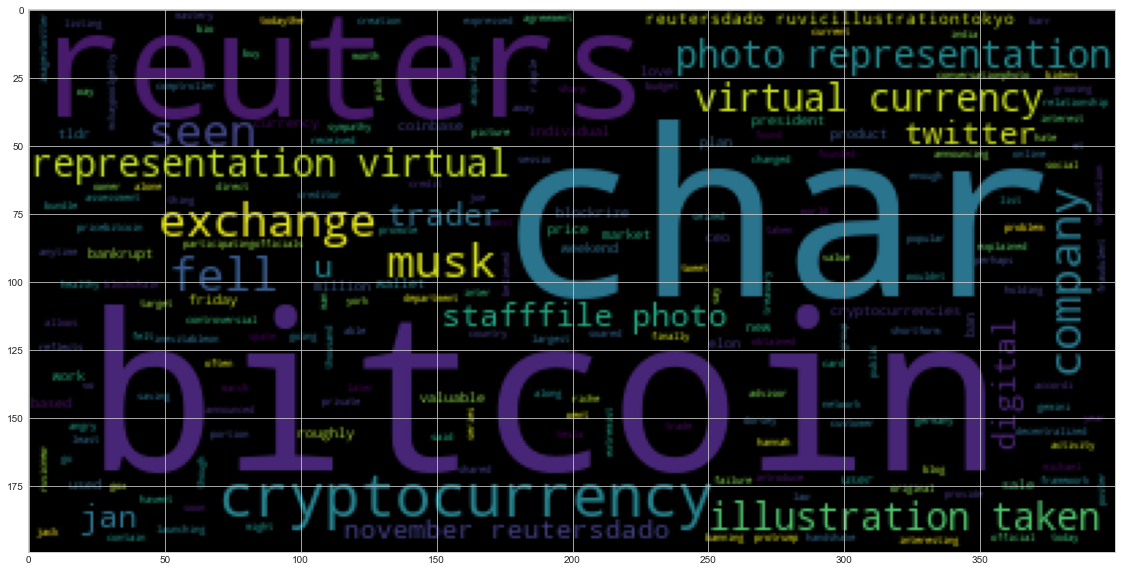

In [43]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

wc = WordCloud().generate(' '.join(flat_btc_tokens))
plt.imshow(wc)
plt.figsize=(20,10)
plt.title = 'Bitcoin Word Cloud'

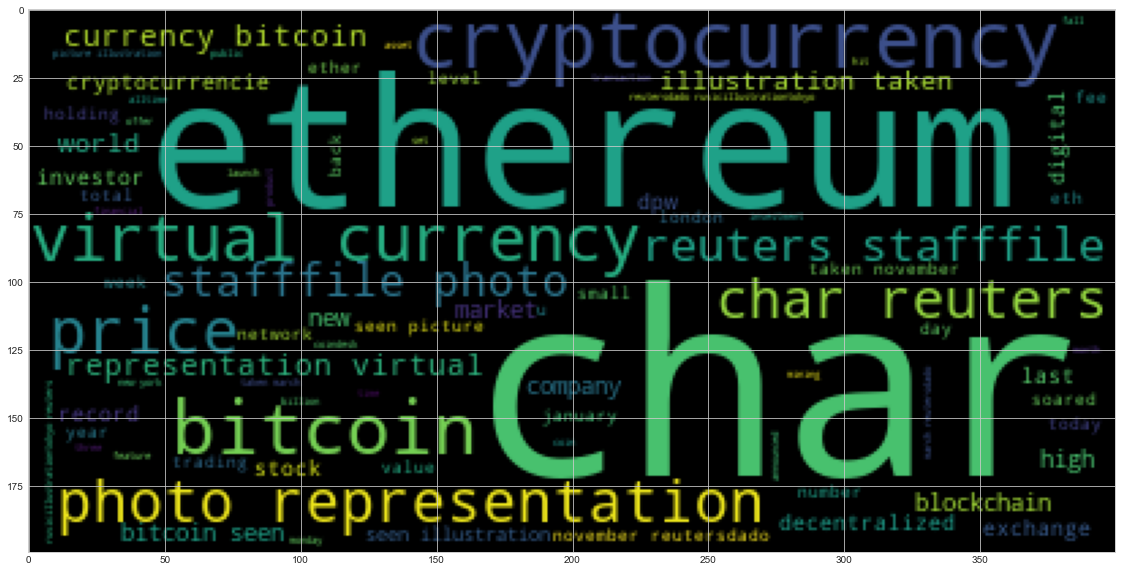

In [45]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

wc = WordCloud().generate(' '.join(flat_eth_tokens))
plt.imshow(wc)
plt.figsize=(20,10)
plt.title = 'Ethereum Word Cloud'

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [46]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm



In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [49]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

btc_all_text = " ".join(bitcoin_df.text.to_list())

In [51]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(btc_all_text)

# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data["title"] = "Bitcoin Named Entity Recognition"

In [54]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style = 'ent')

In [55]:
# List all Entities
# YOUR CODE HERE!
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Twitters NORP
Hannah McKay-Pool/Getty PERSON
Twitter ORG
Jack Dorsey PERSON
Tweets GPE
US GPE
Don PERSON
Mt. Gox PERSON
2014 DATE
Bitcoin GPE
850,000 CARDINAL
Bitcoins PERSON
thousands CARDINAL
Gemini PERSON
Blockrize PERSON
today DATE
Blockrizes GPE
Later this year DATE
Bitcoin GPE
21.11 MONEY
Jan. 28 DATE
70% PERCENT
Bitcoin GPE
Friday, DATE
Tesla ORDINAL
Elon Musk ORG
Twitter ORG
Musk PERSON
Joe Bidens PERSON
the U.S. Treasury Department ORG
Michael S. Barr PERSON
bitcoin GPE
the popular cryptocurrency exchange ORG
today DATE
2012 DATE
India GPE
over millions CARDINAL
5 CARDINAL
5 CARDINAL
Germany GPE
$60 million MONEY
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
Dado Ruvic PERSON
NEW YORK GPE
Reuters ORG
Bitcoin GPE
Elon Musk ORG
Twitter ORG
Musk PERSON
At least 22 CARDINAL
pro-Trump PERSON
roughly $520,000 MONEY
bitcoin GPE
a month DATE
U.S. GPE
202 CARDINAL
10% PERCENT
LONDON GPE
Jan 11 DATE
Reuters ORG
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters

---

### Ethereum NER

In [58]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_all_text = " ".join(ethereum_df.text.to_list())

In [59]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(eth_all_text)


# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum Named Entity Recognition"

In [60]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style = 'ent')

In [61]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

today DATE
2012 DATE
February 3, 2018 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
February 3, 2018 DATE
REUTERS/ ORG
LONDON GPE
first ORDINAL
day of 2021 DATE
bitcoin GPE
the weekend DATE
Anna Irrera PERSON
Dogecoin PERSON
Dogecoin PERSON
nearly 68% PERCENT
0.054496 MONEY
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
January DATE
9, 2021 DATE
7 min QUANTITY
2020 DATE
the year DATE
China GPE
1 CARDINAL
1 CARDINAL
more than $1 trillion MONEY
bitcoin GPE
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
Dado Ruvic PERSON
LONDON GPE
Reuters ORG
Reuters ORG
Bitcoin GPE


---